# ** Final Project **

## Analyzing dataset to find possible pattern in crime

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [32]:
df = pd.read_csv("database.csv")
df

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


In [33]:
df.columns

Index(['Record ID', 'Agency Code', 'Agency Name', 'Agency Type', 'City',
       'State', 'Year', 'Month', 'Incident', 'Crime Type', 'Crime Solved',
       'Victim Sex', 'Victim Age', 'Victim Race', 'Victim Ethnicity',
       'Perpetrator Sex', 'Perpetrator Age', 'Perpetrator Race',
       'Perpetrator Ethnicity', 'Relationship', 'Weapon', 'Victim Count',
       'Perpetrator Count', 'Record Source'],
      dtype='object')

## Data Set Overview

In [34]:
describe = df.describe()
describe = describe.drop(columns = ['Record ID'])
print(describe)
df['Incident'].sum()

                Year       Incident     Victim Age   Victim Count  \
count  638454.000000  638454.000000  638454.000000  638454.000000   
mean     1995.801102      22.967924      35.033512       0.123334   
std         9.927693      92.149821      41.628306       0.537733   
min      1980.000000       0.000000       0.000000       0.000000   
25%      1987.000000       1.000000      22.000000       0.000000   
50%      1995.000000       2.000000      30.000000       0.000000   
75%      2004.000000      10.000000      42.000000       0.000000   
max      2014.000000     999.000000     998.000000      10.000000   

       Perpetrator Count  
count      638454.000000  
mean            0.185224  
std             0.585496  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max            10.000000  


14663963

** There were total 14663963 crimes happened during 1980 to 2014. **

In [26]:
print('Year with most cases of homicide is:', df['Year'].value_counts().idxmax())
print('Month with most cases of homicide is:', df['Month'].value_counts().idxmax())
print('City with most cases of homicide is:', df['City'].value_counts().idxmax())
print('State with most cases of homicide is:', df['State'].value_counts().idxmax())
print('Weapon used the most in homicide cases is:', df['Weapon'].value_counts().idxmax())
print('Most homicide cases were happened in:', df['Victim Race'].value_counts().idxmax())

Year with most cases of homicide is: 1993
Month with most cases of homicide is: July
City with most cases of homicide is: Los Angeles
State with most cases of homicide is: California
Weapon used the most in homicide cases is: Handgun
Most homicide cases were happened in: White


In [35]:
new = df[['Victim Sex', 'Victim Age', 'Perpetrator Sex','Perpetrator Age', 'Relationship', 
                  'Weapon', 'Victim Count', 'Perpetrator Count', 'Crime Type', 'City', 'State','Year', 
                  'Month', 'Incident']]
new

,Victim Sex,Victim Age,Perpetrator Sex,Perpetrator Age,Relationship,Weapon,Victim Count,Perpetrator Count,Crime Type,City,State,Year,Month,Incident
0,Male,14,Male,15,Acquaintance,Blunt Object,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,January,1
1,Male,43,Male,42,Acquaintance,Strangulation,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,March,1
2,Female,30,Unknown,0,Unknown,Unknown,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,March,2
3,Male,43,Male,42,Acquaintance,Strangulation,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,April,1
4,Female,30,Unknown,0,Unknown,Unknown,0,1,Murder or Manslaughter,Anchorage,Alaska,1980,April,2
5,Male,30,Male,36,Acquaintance,Rifle,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,May,1
6,Female,42,Male,27,Wife,Knife,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,May,2
7,Female,99,Male,35,Wife,Knife,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,June,1
8,Male,32,Unknown,0,Unknown,Firearm,0,0,Murder or Manslaughter,Anchorage,Alaska,1980,June,2
9,Male,38,Male,40,Unknown,Firearm,0,1,Murder or Manslaughter,Anchorage,Alaska,1980,June,3


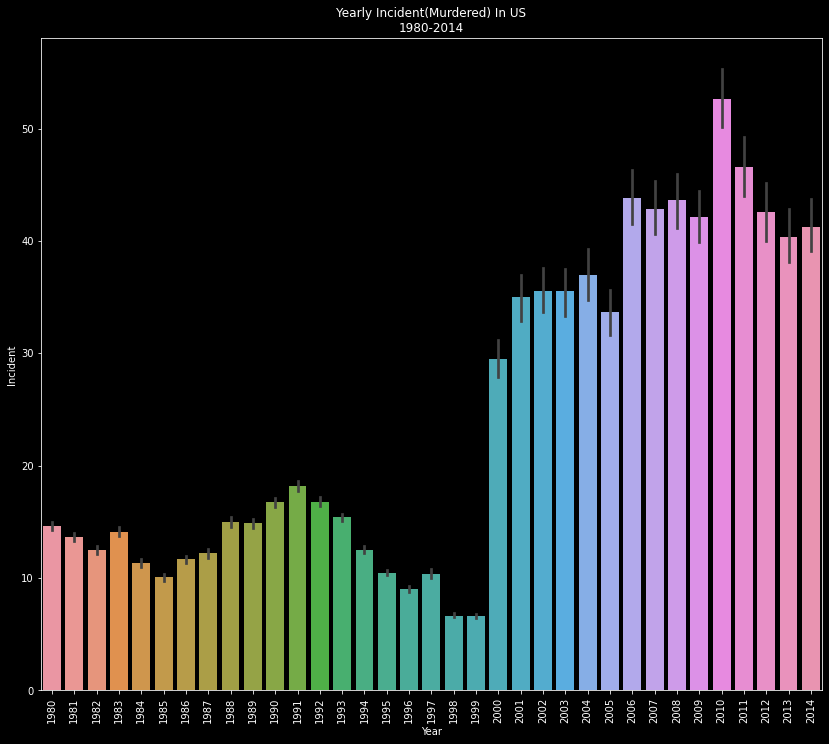

In [36]:
plt.figure(figsize=(14,12))
sns.barplot(new['Year'],new['Incident'])
plt.xticks(rotation= 'vertical')
plt.title('Yearly Incident(Murdered) In US\n1980-2014')
plt.show()

** Through the bar graph of crimes occurring in each year, we can find that there was no significant increase in cases between 1980 and 1999, and even a downward trend. However, since 2000, the number of cases has increased greatly; especially after the 2008 financial crisis, the number of cases reached a peak. **

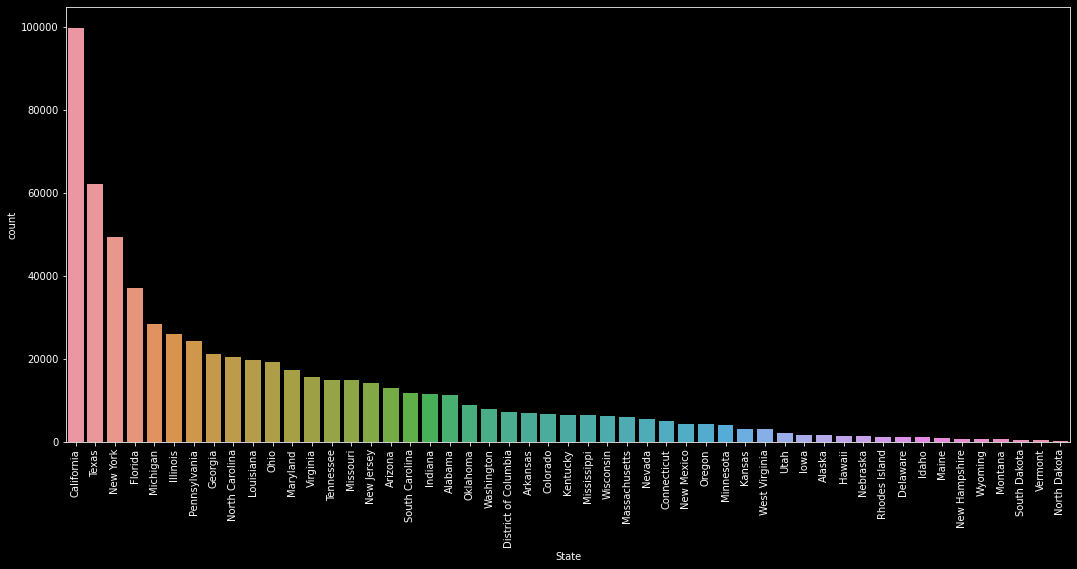

In [37]:
plt.figure(figsize = (18,8))

states_vis = sns.countplot(x='State', order=new['State'].value_counts().index, data=new);

for item in states_vis.get_xticklabels():
    item.set_rotation(90)

In [38]:
new["Victim Sex"].value_counts()

Male       494125
Female     143345
Unknown       984
Name: Victim Sex, dtype: int64

In [39]:
new["Perpetrator Sex"].value_counts()

Male       399541
Unknown    190365
Female      48548
Name: Perpetrator Sex, dtype: int64

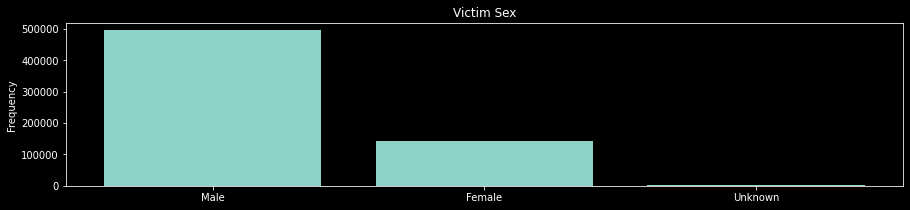

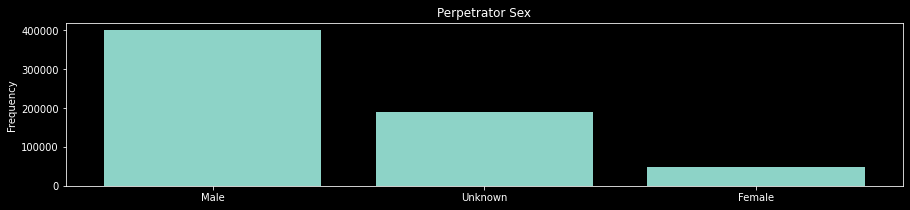

In [43]:
def bar_plot(variable):
    
    var = df[variable]
    
    varValue = var.value_counts()
        
    plt.figure(figsize = (15,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show

category1=["Victim Sex","Perpetrator Sex"]
list(map(lambda x:bar_plot(x), category1))
plt.show()

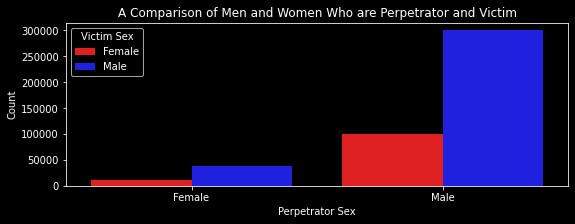

In [45]:
df_known = df[(df['Victim Sex'] != 'Unknown') & (df['Perpetrator Sex'] != 'Unknown')]
df_gender = df_known.groupby(['Perpetrator Sex','Victim Sex']).size()
df_gender_df = df_gender.to_frame(name='Count')
df_gender_df.reset_index(inplace=True)

plt.figure(figsize = (9,3))
clrs = ['red',"blue"]
sns.barplot(x='Perpetrator Sex', y="Count", hue='Victim Sex', palette=clrs, data=df_gender_df);
plt.title("A Comparison of Men and Women Who are Perpetrator and Victim");


** Through the bar graph on gender, we can clearly see that men account for a huge proportion of offenders. Male offenders have approximately 400,000 murders. By comparing the bar graphs, 300,000 crime victims were men and 100,000 crime victims were women. **

In [50]:
w = new.groupby('Weapon').sum()['Incident']
w

Weapon
Blunt Object     1591719
Drowning            6012
Drugs              37076
Explosives          7150
Fall                1830
Fire              119624
Firearm          2172063
Gun                11544
Handgun          7105162
Knife            1910636
Poison              7224
Rifle             379276
Shotgun           364314
Strangulation      61706
Suffocation        23656
Unknown           864971
Name: Incident, dtype: int64

Text(0.5, 1.0, 'Proportion of weapons used in cases')

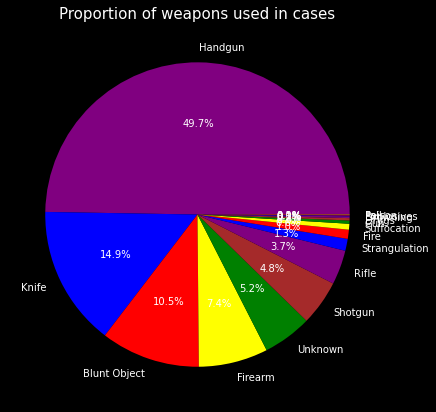

In [72]:
new.Weapon.dropna(inplace = True)
labels = new.Weapon.value_counts().index
colors = ['purple','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = new.Weapon.value_counts().values


plt.figure(figsize = (7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Proportion of weapons used in cases',color = 'white',fontsize = 15)

** We can find from the circular chart that the use of handgun in murder cases reached 49.7%. The criminals' choice to use handgun shows that it has good concealment and a high fatality rate. **

In [70]:
new["Relationship"].value_counts()

Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

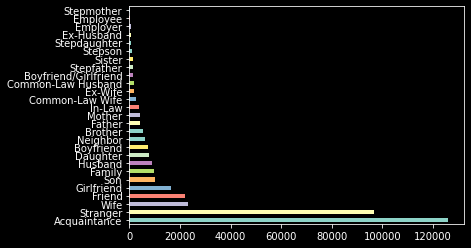

In [74]:
a = new["Relationship"].replace('Unknown', np.nan)
a.value_counts().plot.barh();

** Regarding the analysis of the relationship between the victim and the offender in the data set, another author's surprising discovery is that even though there are approximately 270,000 data in the data set that are unknown. But in the known relationships, acquaintances commit crimes the most, even more frequently than strangers commit crimes in our conventional knowledge. **

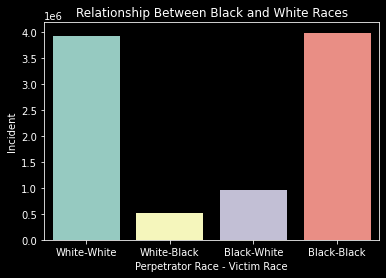

In [75]:
df_race_pv = df.pivot_table(index=["Perpetrator Race","Victim Race"], aggfunc=sum)["Incident"]
df_race_pv = pd.DataFrame(df_race_pv)

df_race = pd.DataFrame({"White-White":df_race_pv.loc["White","White"].values,
                 "White-Black":df_race_pv.loc["White","Black"].values,
                 "Black-White":df_race_pv.loc["Black","White"].values,
                 "Black-Black":df_race_pv.loc["Black","Black"].values})

df_race = df_race.T
df_race.columns = ["Incident"]

sns.barplot(x=df_race.index, y="Incident", data=df_race);
plt.title("Relationship Between Black and White Races");
plt.xlabel("Perpetrator Race - Victim Race");